In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [4]:
event1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/First_Health_Camp_Attended.csv')
event2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Second_Health_Camp_Attended.csv')
event3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Third_Health_Camp_Attended.csv')
patient_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/patient_attendance.csv')
patient_df1 = patient_df.copy()
print(patient_df1['Patient_ID'].nunique())


37633


In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi'] = 200

In [5]:
train = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
train1 = train.copy()
test_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test.csv') 
test_df1 = test_df.copy() 

In [102]:
from numpy import argmax 

In [125]:
patient_df1['Education_Score'].describe()

count    37633.000000
mean         0.036776
std          0.188214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Education_Score, dtype: float64

In [130]:
# fig, ax = plt.subplots()
# counts = [848,1019,886,813,37633]
# count_labels = ['Online_Follower','Facebook_Shared','LinkedIn_Shared','Twitter_Shared', 'Total' ]

# ax.bar(range(len(counts)), counts)
# ax.set_xticks(range(len(counts)))
# ax.set_xticklabels(count_labels, rotation=45);
# plt.figsize(8,8)
# plt.savefig('Online_Sharing_Counts')

In [131]:
#patient_df1[['Online_Follower','Facebook_Shared','LinkedIn_Shared','Twitter_Shared']].hist(figsize=(12,8))

In [50]:
print(train.columns)
print(test_df.columns)
print(patient_df1.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')
Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Patient_ID', 'Online_Follower',
       'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Income',
       'Education_Score', 'Age', 'First_Interaction', 'City_Type',
       'Employer_Category', 'Job_Type', 'Event1_or_2'],
      dtype='object')


In [ ]:
p_id = patient_df1.Patient_ID.values
pp_id = test_df.Patient_ID.values

In [ ]:
def full_discolusure(pp_id,p_id):
    print(f'length of train is {len(p_id)} and length of patient is {len(pp_id)} ')
    p1,p2 = set(p_id) , set(pp_id)
    print(f' unique for train is {len(p1)} and unique for patient is {len(p2)} ')
    d = p1.difference(p2)
    print(f'The difference from p1 to p2 is {len(d)}')
    dd = p2.difference(p1)
    print(f'The difference from p2 to p1 is {len(dd)}')
    u, uu = p1.intersection(p2), p2.intersection(p1)
    return len(u),len(uu)
print(full_discolusure(pp_id,p_id))

In [49]:
train1 = train1.merge(patient_df1, on=['Patient_ID'], how = 'left')

In [50]:
test_df1 = test_df1.merge(patient_df1, on = ['Patient_ID'], how='left')

In [ ]:
train1[train1['Patient_ID'] == 489652 ]

In [ ]:
train1.shape

In [ ]:
test_df1.shape

In [ ]:
test_df1.columns

In [ ]:
train1.columns

In [134]:
#train1 = train1.drop(['Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction', 'Health_Camp_ID'],axis=1)

In [135]:
train1a = train1.drop(['Health_Camp_ID'],axis=1)

In [52]:
test_df1 = test_df1.drop(['Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction','Health_Camp_ID'],axis=1)

In [136]:
test_df1a = test_df1.drop(['Health_Camp_ID'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split 

In [53]:
y1, y2 = train1.pop('Event1_or_2') , test_df1.pop('Event1_or_2')

In [55]:
X_train , X_test = train1 , test_df1

In [137]:
X_train2 , X_test2 = train1a , test_df1a

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver="lbfgs")
logmodel.fit(X_train, y1)

LogisticRegression()

In [138]:
logmodel2 = LogisticRegression(solver="lbfgs")
logmodel2.fit(X_train2, y1)

LogisticRegression()

In [57]:
predictions = logmodel.predict_proba(X_test)[:,1]

In [141]:
predictions_2 = logmodel2.predict_proba(X_test2)[:,1]

In [65]:
predictions

array([0.64779041, 0.80194899, 0.52010029, ..., 0.54054684, 0.51940679,
       0.95186922])

In [69]:
predict = logmodel.predict(X_test)

In [99]:
preds, preds2 = predictions>.55 ,predictions>.52

In [143]:
predsa, preds2a = predictions_2>.55 ,predictions_2>.52

In [86]:
for name, coef in zip(preds2[1:], logmodel.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

True: 0.0002
True: 0.2605
True: 0.0819
True: 0.0001
True: 0.0056
True: 0.0740
True: 0.0074
True: 0.0082
True: 0.0065
True: 0.0060
True: 0.0285
True: 0.0162
True: 0.0449
True: 0.0817
True: -0.0001


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y2,preds2) ) 

              precision    recall  f1-score   support

           0       0.73      0.35      0.48     18506
           1       0.54      0.85      0.67     16743

    accuracy                           0.59     35249
   macro avg       0.64      0.60      0.57     35249
weighted avg       0.64      0.59      0.57     35249



In [144]:
print(classification_report(y2,predictions_2) )

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [101]:
print(confusion_matrix(y2,preds2)) 

[[ 6526 11980]
 [ 2429 14314]]


In [63]:
print(classification_report(y2,preds) ) 

              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249



In [72]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [73]:
X = test_df1
X_const = add_constant(X, prepend=True)
y3 = y2.copy()
logit_model = Logit(y3, X_const).fit()

         Current function value: 0.604402
         Iterations: 35


/home/allen/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Event1_or_2   No. Observations:                35249
Model:                          Logit   Df Residuals:                    35233
Method:                           MLE   Df Model:                           15
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                  0.1265
Time:                        17:04:29   Log-Likelihood:                -21305.
converged:                      False   LL-Null:                       -24389.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.0886      5.799     -2.947      0.003     -28.454      -5.723
Health_Camp_ID      0.0025      0.001      2.818      0.005       0.001       0.004
Var1               -0.0077      0.009     -0.827      0.408      -0.026       0.011
Var2               -0.0447      0.019     -2.331      0.020      -0.082      -0.007
Var3               15.0356    1.5e+04      0.001      0.999   -2.94e+04    2.94e+04
Var4               -0.2325      0.079     -2.953      0.003      -0.387      -0.078
Var5                0.5557      0.033     16.708      0.000       0.491       0.621
Online_Follower     0.0836      0.078      1.069      0.285      -0.070       0.237
LinkedIn_Shared     0.0123      0.069      0.179      0.858      -0.122       0.147
Twitter_Shared      0.0784      0.087      0.903      0.366      -0.092       0.249
Facebook_Shared    -0.0831      0.081     -1.025      0.306      -0.242       0.076
Income             -0.0215      0.029     -0.735      0.462      -0.079       0.036
Education_Score     1.8575      0.105     17.634      0.000       1.651       2.064
Age                 1.0032      0.038     26.143      0.000       0.928       1.078
City_Type           0.5858      0.025     23.745      0.000       0.537       0.634
Job_Type        -1.179e-05    6.3e-06     -1.871      0.061   -2.41e-05    5.63e-07
===================================================================================
"""

In [83]:
kfold = KFold(n_splits=10)

accuracies = []
precisions = []
recalls = []

#X_train, X_test, y_train, y_test = train_test_split(X, y)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.610631088689997
Precision: 0.6252807535200466
Recall: 0.9506792584467879


In [ ]:
''' 
n=20 
Accuracy: 0.6178722087906098
Precision: 0.6242284105951045
Recall: 0.9587480176361393
'''
#[[16088  2418]
 #[ 9349  7394]]
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''

In [78]:
def simple_plot(ax, x, y, x_label, y_label, title):
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

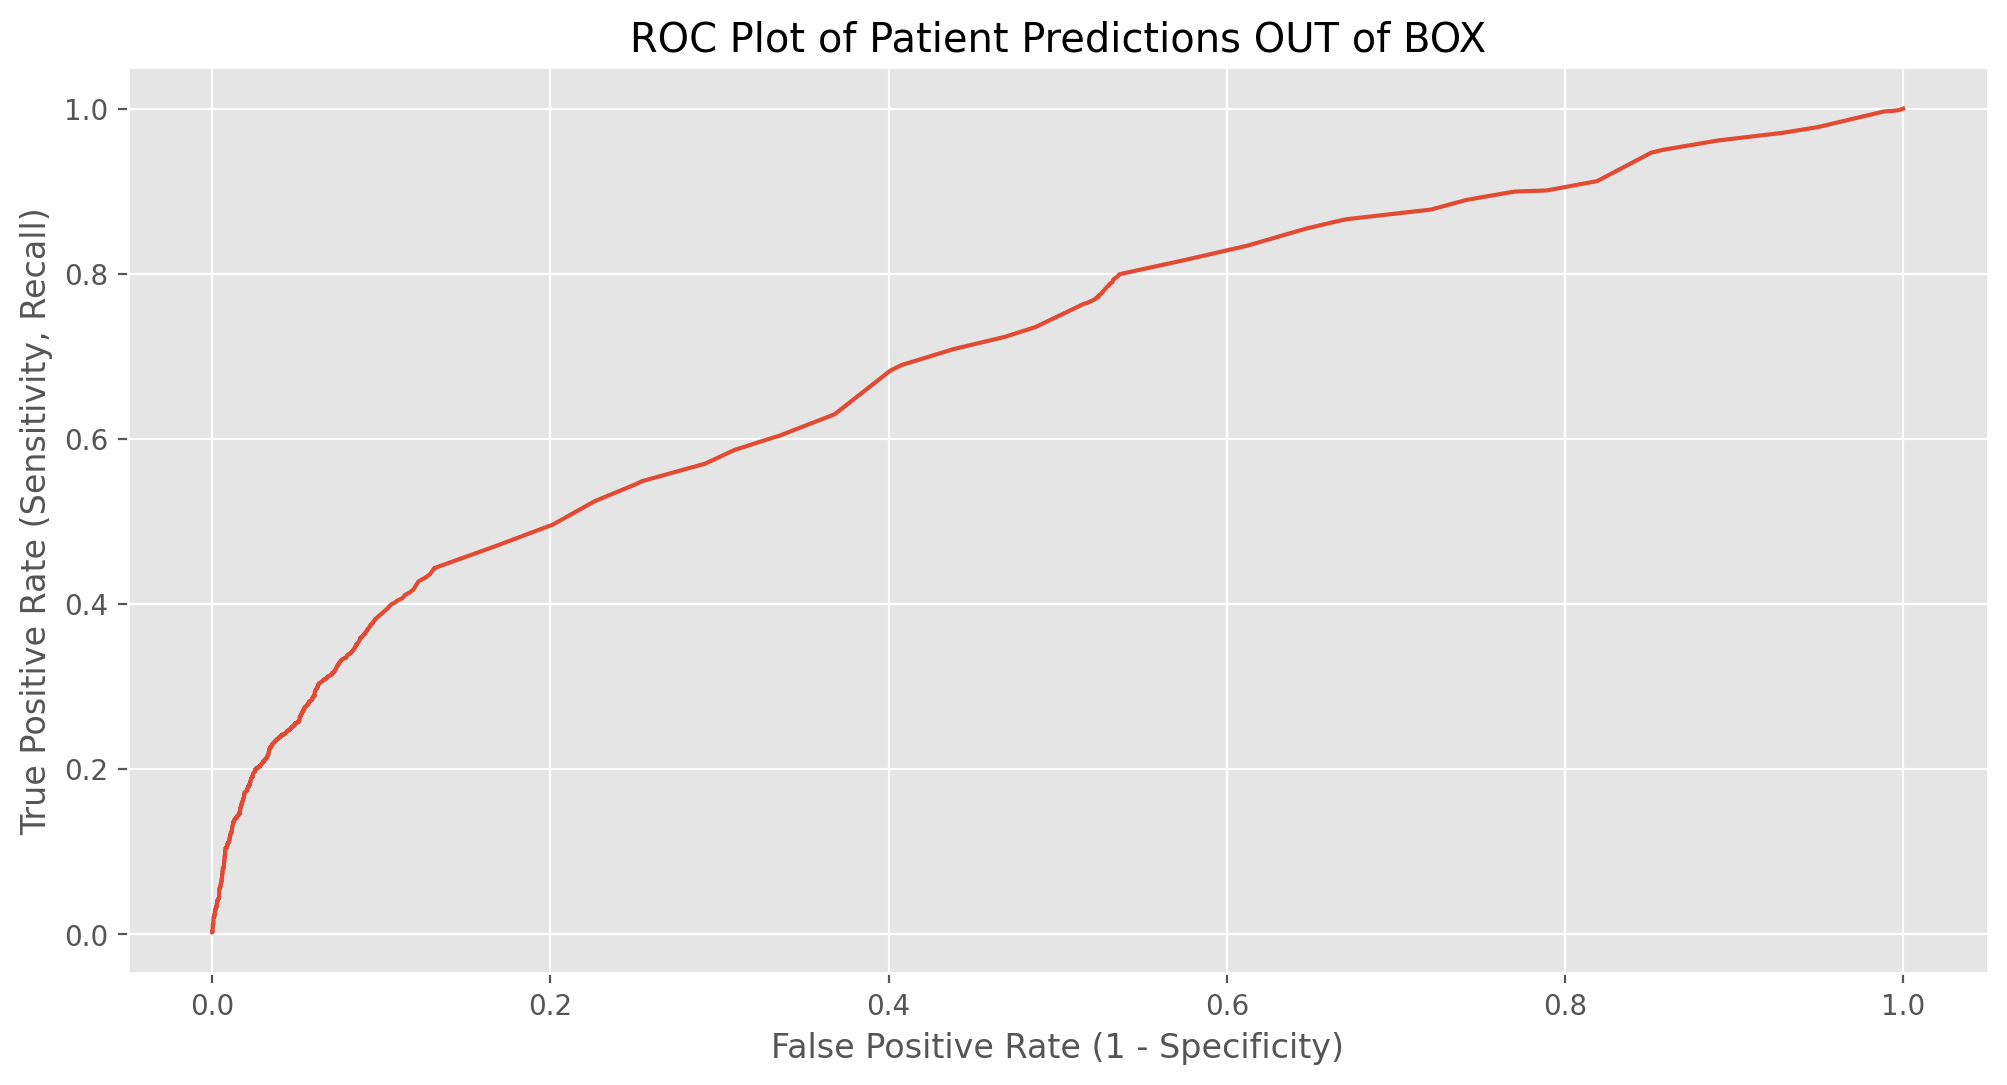

In [105]:

model3 = LogisticRegression(solver='lbfgs')
model3.fit(X_train, y1)
probabilities2 = model3.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(probabilities2, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot of Patient Predictions OUT of BOX")

In [ ]:
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''

In [95]:
f_score = (2* .63 * .87)/(.63+.87)
print(f_score)

0.7308


In [ ]:
'''
              precision    recall  f1-score   support

           0       0.73      0.35      0.48     18506
           1       0.54      0.85      0.67     16743

    accuracy                           0.59     35249
   macro avg       0.64      0.60      0.57     35249
weighted avg       0.64      0.59      0.57     35249


'''

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y1)

RandomForestClassifier(n_estimators=200)

In [110]:
rfc_preds = rfc.predict(X_test)

In [111]:
print(classification_report(y2,rfc_preds) ) 

              precision    recall  f1-score   support

           0       0.62      0.35      0.45     18506
           1       0.52      0.76      0.61     16743

    accuracy                           0.55     35249
   macro avg       0.57      0.56      0.53     35249
weighted avg       0.57      0.55      0.53     35249



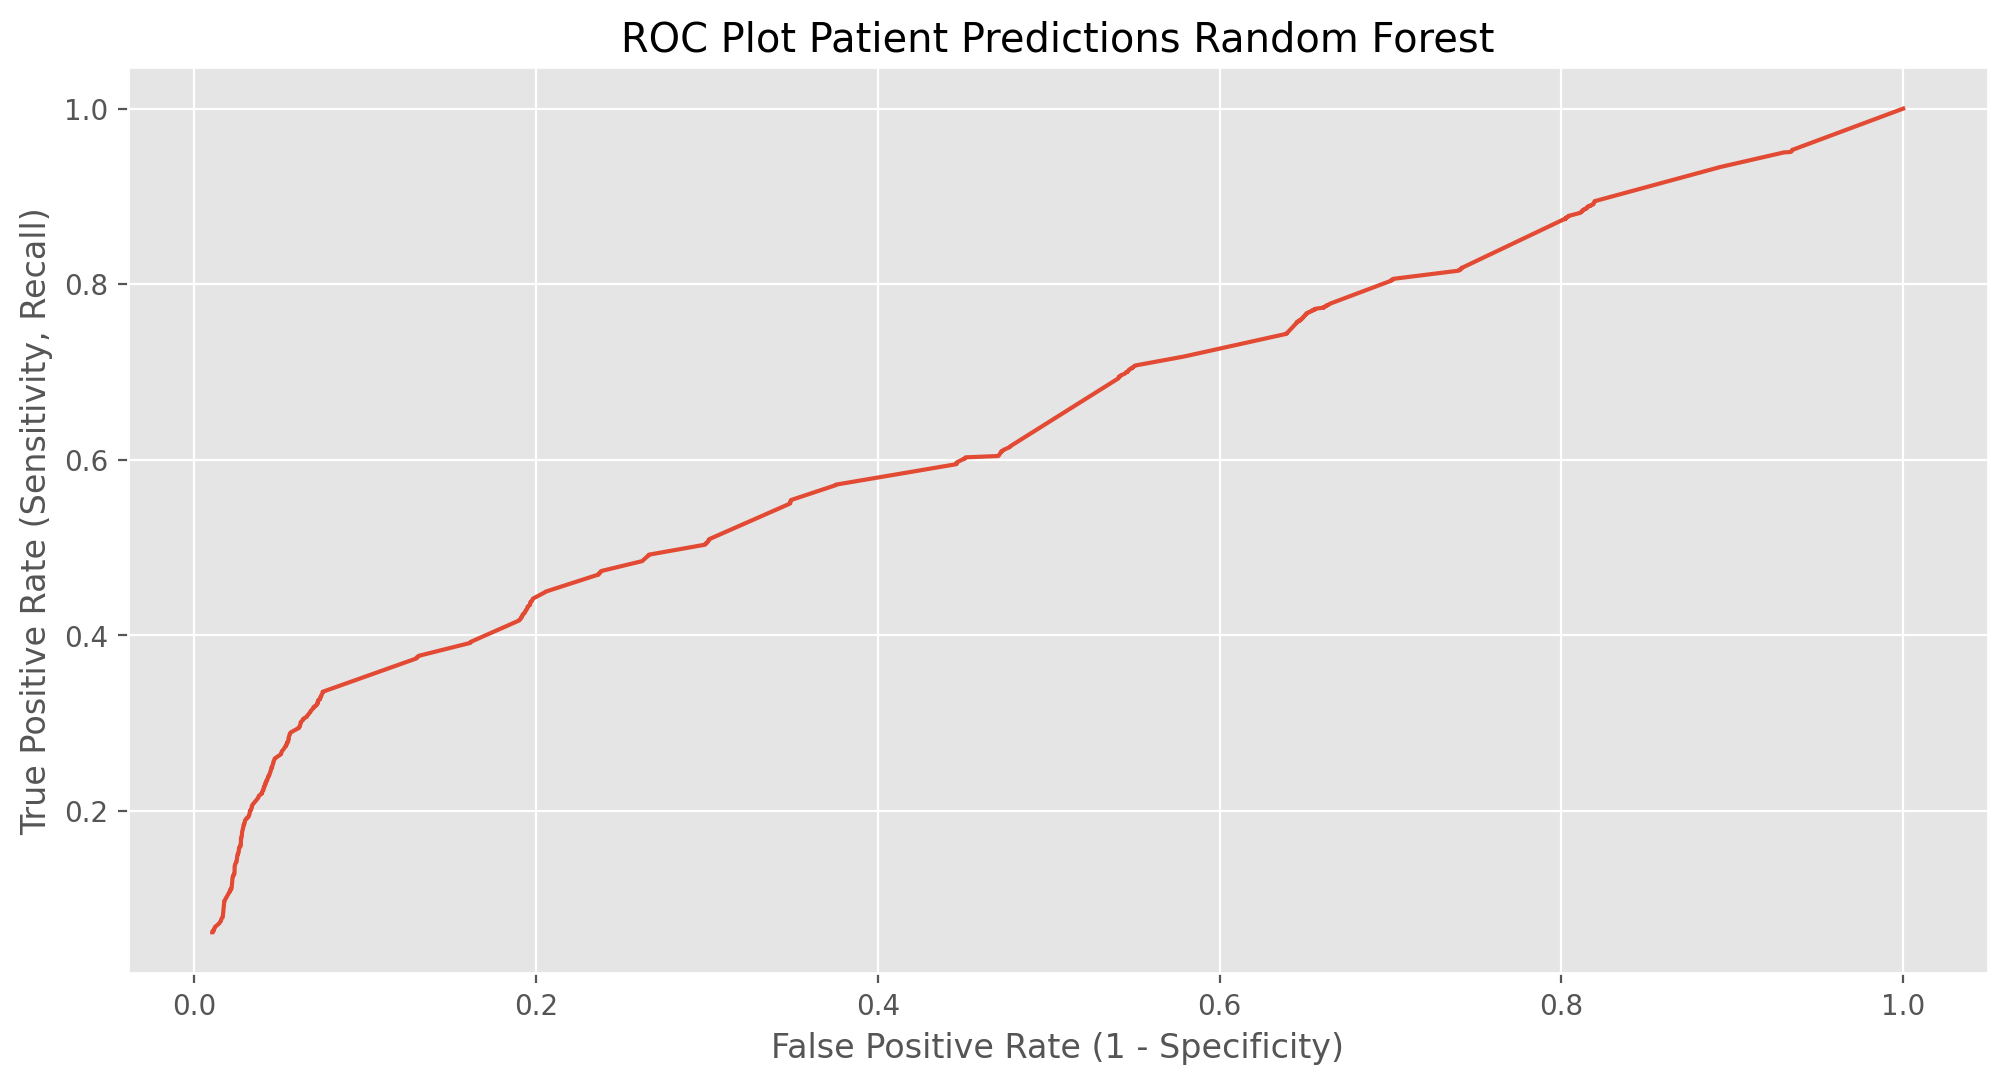

In [133]:
model4 = RandomForestClassifier(n_estimators = 200)
model4.fit(X_train, y1)
proba_Forest = model4.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(proba_Forest, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot Patient Predictions Random Forest")